# K-means method
## Setting up for clustering analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report;
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [ ]:
%matplotlib inline
plt.figure(figsize=(7,4));

In [4]:
iris = datasets.load_iris()
X = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Building and running your model

In [6]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

## Plotting your model outputs

In [7]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

In [9]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Text(0.5, 1.0, 'K-Means Classification')

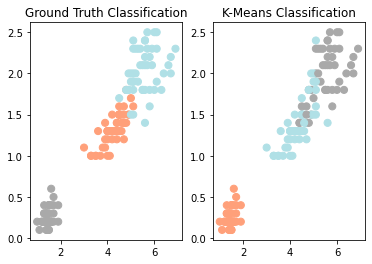

In [12]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

In [15]:
# labels are off - 
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

Text(0.5, 1.0, 'K-Means Classification')

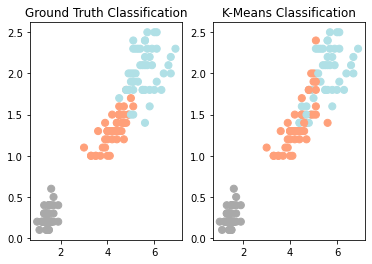

In [16]:
plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

## Evaluate your clustering results
- high precision+ high recall = highly accurate results

## Precison: measure of the model's relevancy
- **Precision** (aka. positive predictive value) $\frac{tp}{tp+fp}$ 
- is the fraction of relevant instances among the retrieved instances
- 0.74 means 74% points predicted to have label 1 were correct, 26% were wrongly predicted as labeled 1.
<br><br>
## Recall: measure of model's completeness.
- **Recall** (also known as sensitivity) $\frac{tp}{tp+fn}$ 
- is the fraction of relevant instances that were retrieved. 
- 0.72 = 72% of the points that are in fact from the label 2 were correctly recognized and 28% of label 2 were not recognized as such

In [14]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



# Hierarchial Clustering
-  hierarchical clustering methods do
not require the specification of number K of clusters. 
- Instead, they require the user to specify a measure of dissimilarity between (disjoint) groups of observations, <br>
based on the pairwise dissimilarities among the observations in the two groups.
- As the name suggests, they produce hierarchical representations in which the clusters at each level of the <br>
hierarchy are created by merging clusters at the next lower level. 
- At the lowest level, each cluster contains a single observation. At the highest level there is only one cluster containing all of the data.
- Strategies for hierarchical clustering divide into two basic paradigms: agglomerative (bottom-up) and divisive (top-down).
- **Distance Merics**: Euclidean, Manhattan, Cosine
- **Linkage Parameters**:  Ward, Complete, Average
- Parameter Selection by trial end error


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [2]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [4]:
cars = pd.read_csv( 'data/mtcars.csv')
cars.columns = [ 'car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb' ]
X = cars[['mpg', 'disp', 'hp', 'wt']].values # only values
y = cars.iloc[ : , (9)].values # selcts column at position 9 = am (automatic/manual)


## Dendogram

In [10]:
# 'ward' Linkage method
# Z is the clustering result
Z = linkage(X, 'ward')

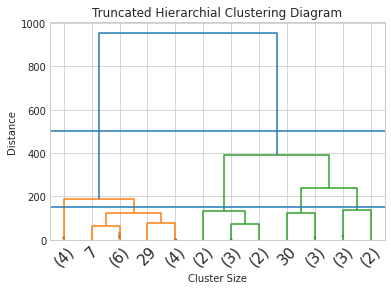

In [11]:
# dendrogram from hierarchial clustering
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45,
    leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500) # horizontal line
plt.axhline(y=150)
plt.show()

- from the dendrogram we can see that two groups make sense
- and the min distance should be 400 while the max distance may be 600

##  Clustering
- we test the different methods

In [12]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)
sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [13]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k,
                                      affinity='euclidean',
                                      linkage='average')
Hclustering.fit(X)
sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [15]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k,
                                      affinity='manhattan',
                                      linkage='average')
Hclustering.fit(X)
sm.accuracy_score(y, Hclustering.labels_)

0.71875

# DBSCan 
- DBSC = density-based spatial clustering
- DBSC algorithms are very effienct at finding high-density regions and outliers.
- outliers should be $\leq 5%$ of observations
- The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.
- clusters core samples (dense areas in the dataset)<br>
and denotes non-core samples (spares portions in the dataset)
## Parameters
- eps: The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps.
- min_samples: Minimum number of data points to define a cluster.

Based on these two parameters, points are classified as:

- **Core point**: A point is a core point if there are at least minPts number of points (including the point itself) in its surrounding area with radius eps.
- **Border point**: A point is a border point if it is reachable from a core point and there are less than minPts number of points within its surrounding area.
- **Outlier**: A point is an outlier if it is not a core point and not reachable from any core points.

In [23]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [25]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [26]:
# with this example, we're going to use the same data that we used for the rest of this chapter. So we're going to copy and
# paste in the code.
address = 'data/iris.data.csv'
df = pd.read_csv(address, header=None, sep=',')

df.columns = [ 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species' ]

data = df.iloc[:, 0:4].values # 0:4 exclusiv
target = df.iloc[:, 4].values # species is target

df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
# points of the same neighborhood have a max distance of 0.8
# core points consist of min 19 samples
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model.get_params())

{'algorithm': 'auto', 'eps': 0.8, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 19, 'n_jobs': None, 'p': None}


## find outliers

In [41]:
outliers_df = pd.DataFrame(data)
# counts the labels we have 6 times label '-1' that's 6/150 = 4% outliers
print(Counter(model.labels_))
print(outliers_df[model.labels_ == -1]) # outliers were labeled -1

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


In [43]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

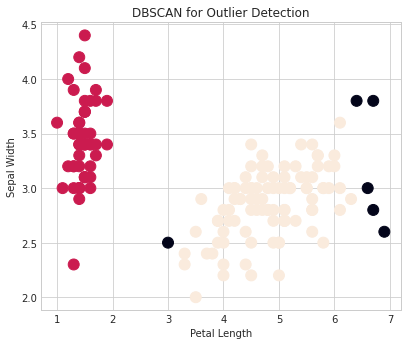

In [42]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:, 2], data[:, 1], c=colors, s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')